###Ammar Owaineh
#Project 1 - Part 2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


*The data has 8,523 rows and 12 colums, of which 7 are categorical and 5 are numerical*

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

*The datatypes for each column are showsn above*

In [7]:
df.duplicated().sum()

0

*The data has no duplicates*

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

*The data has missing values in the Outlet_Size and Item_Weight columns that need to be replaced.*

In [9]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


*The data in the Outlet_Size column was replaced with the string 'MISSING' because it is an object.*

In [10]:
df['Item_Weight'].mean()

12.857645184135976

In [11]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


*The missing values in 'Item_Weight' column were replaced with the mean of the column because it is a float and because replacing it with a new value will skew the data.*

In [12]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

*All the missing values has been replaced with placeholders.*

In [13]:
df.value_counts('Outlet_Establishment_Year')

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1999     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [14]:
df.value_counts('Item_Identifier')

Item_Identifier
FDG33    10
FDW13    10
NCL31     9
FDX04     9
NCQ06     9
         ..
FDN52     1
FDC23     1
FDT35     1
DRF48     1
FDE52     1
Name: count, Length: 1559, dtype: int64

In [15]:
df.value_counts('Item_Type')

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [16]:
df.value_counts('Outlet_Identifier')

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [17]:
df.value_counts('Outlet_Size')

Outlet_Size
Medium     2793
MISSING    2410
Small      2388
High        932
Name: count, dtype: int64

In [18]:
df.value_counts('Outlet_Location_Type')

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [19]:
df.value_counts('Outlet_Type')

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [20]:
df.value_counts('Item_Visibility')

Item_Visibility
0.000000    526
0.076975      3
0.076856      2
0.107663      2
0.014048      2
           ... 
0.038729      1
0.038725      1
0.038722      1
0.038721      1
0.328391      1
Name: count, Length: 7880, dtype: int64

In [21]:
df.value_counts('Item_MRP')

Item_MRP
172.0422    7
188.1872    6
196.5084    6
170.5422    6
196.5768    6
           ..
117.1834    1
117.1492    1
117.1124    1
117.0492    1
143.5154    1
Name: count, Length: 5938, dtype: int64

In [22]:
df.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [23]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

*All columns were checked for inconsistent data. Inconsistent data was found and replaced in the 'Item_Fat_Content' column.*

In [24]:
item_visibility_mean = df['Item_Visibility'].mean().round(2)
item_visibility_min = df['Item_Visibility'].min()
item_visibility_max = df['Item_Visibility'].max()
print (f'The mean for Item Visibility column is {item_visibility_mean}')
print (f'The minimum for Item Visibility column is {item_visibility_min}')
print (f'The maximum for Item Visibility column is {item_visibility_max}')

The mean for Item Visibility column is 0.07
The minimum for Item Visibility column is 0.0
The maximum for Item Visibility column is 0.328390948


In [25]:
item_mrp_mean = df['Item_MRP'].mean().round(2)
item_mrp_min = df['Item_MRP'].min()
item_mrp_max = df['Item_MRP'].max()
print (f'The mean for Item Maximum Retail Price column is {item_mrp_mean}')
print (f'The minimum for Item Maximum Retail Price column is {item_mrp_min}')
print (f'The maximum for Item Maximum Retail Price column is {item_mrp_max}')



The mean for Item Maximum Retail Price column is 140.99
The minimum for Item Maximum Retail Price column is 31.29
The maximum for Item Maximum Retail Price column is 266.8884


In [26]:
item_outlet_sales_mean = df['Item_Outlet_Sales'].mean().round(2)
item_outlet_sales_min = df['Item_Outlet_Sales'].min()
item_outlet_sales_max = df['Item_Outlet_Sales'].max()
print (f'The mean for Item Outlet Sales column is {item_outlet_sales_mean}')
print (f'The minimum for Item Outlet Sales column is {item_outlet_sales_min}')
print (f'The maximum for Item Outlet Sales column is {item_outlet_sales_max}')


The mean for Item Outlet Sales column is 2181.29
The minimum for Item Outlet Sales column is 33.29
The maximum for Item Outlet Sales column is 13086.9648



*The mean, minimum value, and maximum value of each numerical column are detailed above.*

#Project 1 - Part 3

*The following histogram plots will highlight the numerical columns in the dataset which are:*
* Item Weight       
* Item Visibility              
* Item Maximum Retail Price                    
* Item Outlet Sales
            

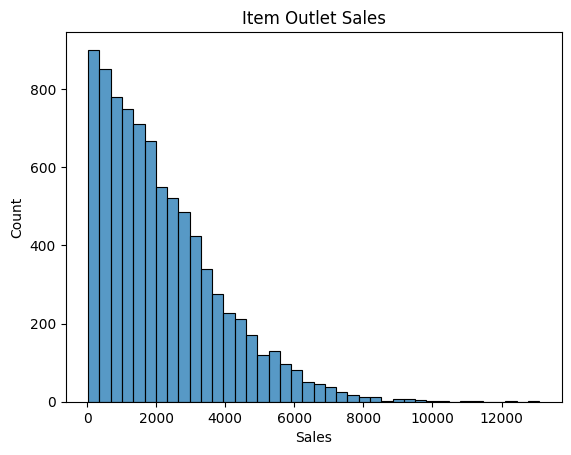

In [33]:
ax = sns.histplot(df['Item_Outlet_Sales'], bins = 40)
ax.set_title('Item Outlet Sales')
ax.set_xlabel('Sales')
plt.show()

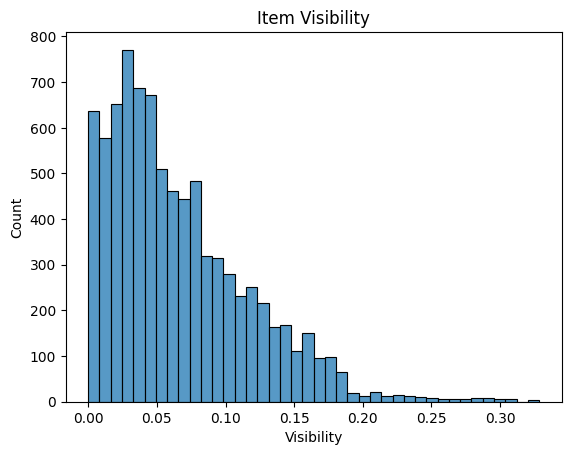

In [35]:
ax = sns.histplot(df['Item_Visibility'], bins = 40)
ax.set_title('Item Visibility')
ax.set_xlabel('Visibility')
plt.show()

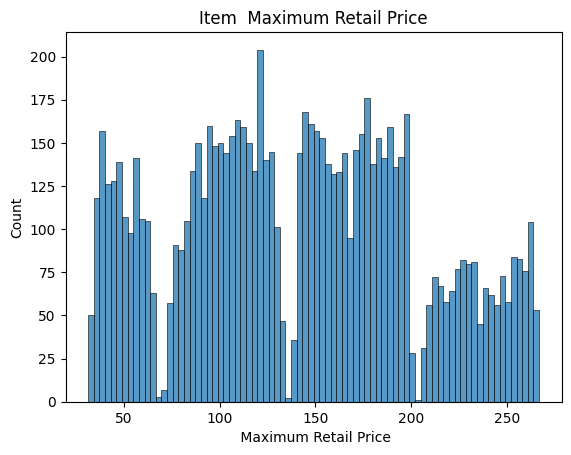

In [38]:
ax = sns.histplot(df['Item_MRP'], bins = 80)
ax.set_title('Item  Maximum Retail Price')
ax.set_xlabel(' Maximum Retail Price')
plt.show()

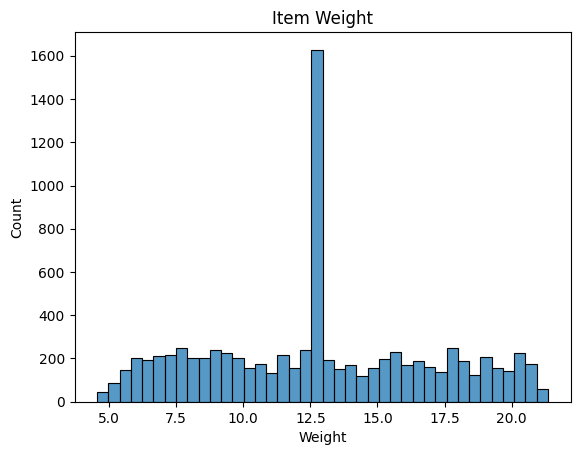

In [34]:
ax = sns.histplot(df['Item_Weight'], bins = 40)
ax.set_title('Item Weight')
ax.set_xlabel('Weight')
plt.show()

*The following boxplots will highlight the numerical columns in the dataset which are:*
* Item Weight       
* Item Visibility              
* Item Maximum Retail Price                    
* Item Outlet Sales
            

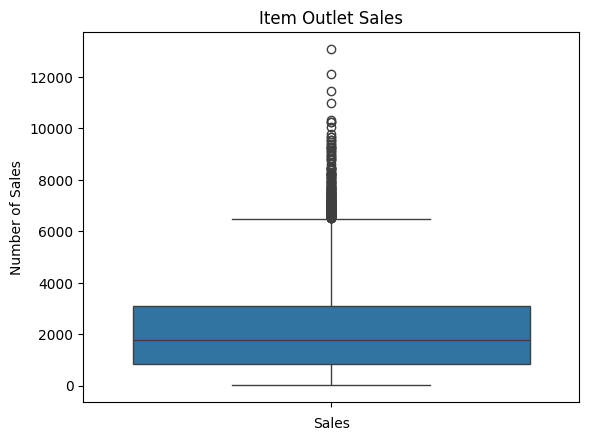

In [85]:
ax =sns.boxplot(df['Item_Outlet_Sales'])
ax.set_title('Item Outlet Sales')
ax.set_xlabel('Sales')
ax.set_ylabel('Number of Sales')
plt.show()

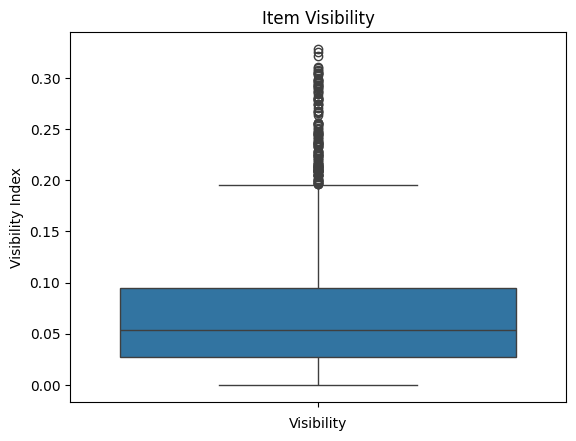

In [86]:
ax =sns.boxplot(df['Item_Visibility'])
ax.set_title('Item Visibility')
ax.set_xlabel('Visibility')
ax.set_ylabel('Visibility Index')
plt.show()

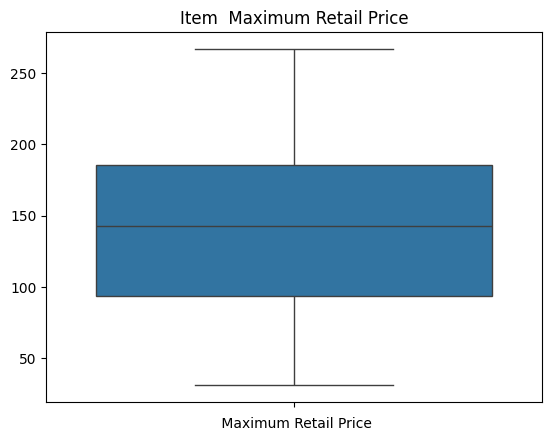

In [88]:
ax = sns.boxplot(df['Item_MRP'])
ax.set_title('Item  Maximum Retail Price')
ax.set_xlabel(' Maximum Retail Price')
ax.set_ylabel('')
plt.show()

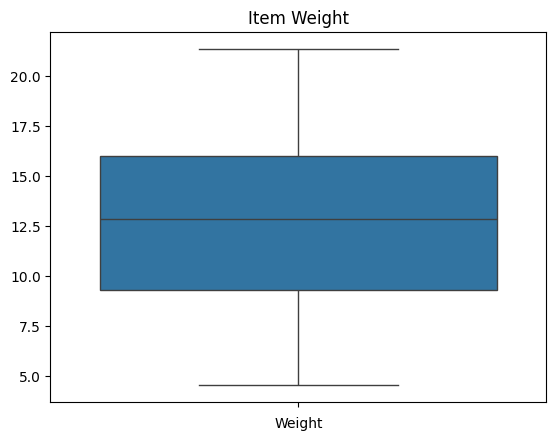

In [87]:
ax = sns.boxplot(df['Item_Weight'])
ax.set_title('Item Weight')
ax.set_xlabel('Weight')
ax.set_ylabel('')
plt.show()

*The following plots will illustrate the number of values in each categorical column, which are:*
* Item Fat Content
* Item Type              
* Outlet Identifier     
* Outlet Establishment Year   
* Outlet Size                
* Outlet Location Type       
* Outlet Type                


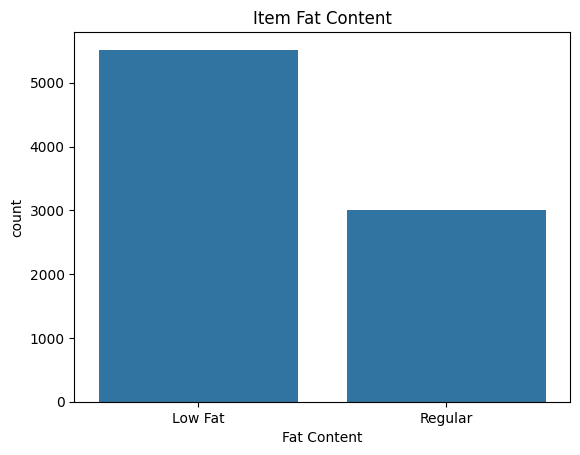

In [58]:
ax =sns.countplot(x = 'Item_Fat_Content', data = df)
ax.set_title('Item Fat Content')
ax.set_xlabel('Fat Content')
plt.show()

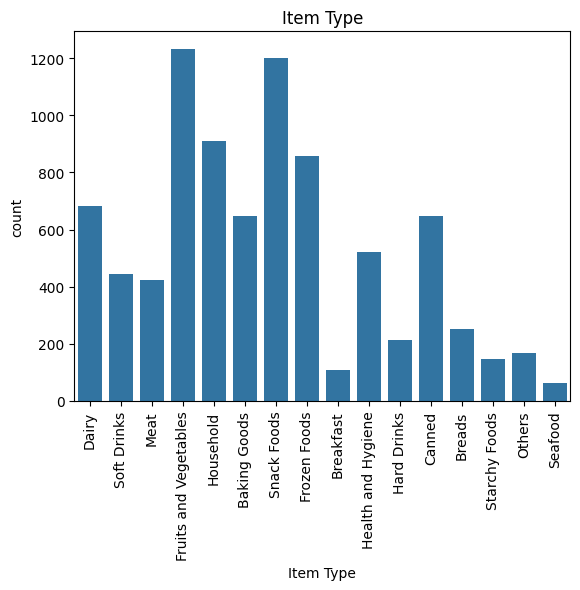

In [60]:
ax =sns.countplot(x = 'Item_Type', data = df)
ax.set_title('Item Type')
ax.set_xlabel('Item Type');
plt.xticks(rotation = 90);

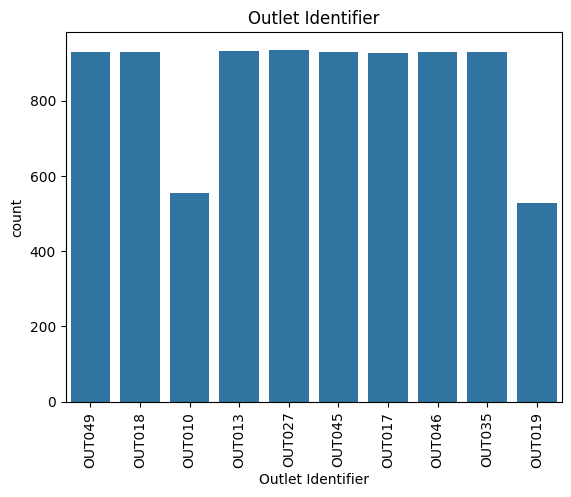

In [63]:
ax =sns.countplot(x = 'Outlet_Identifier', data = df)
ax.set_title('Outlet Identifier')
ax.set_xlabel('Outlet Identifier');
plt.xticks(rotation = 90);

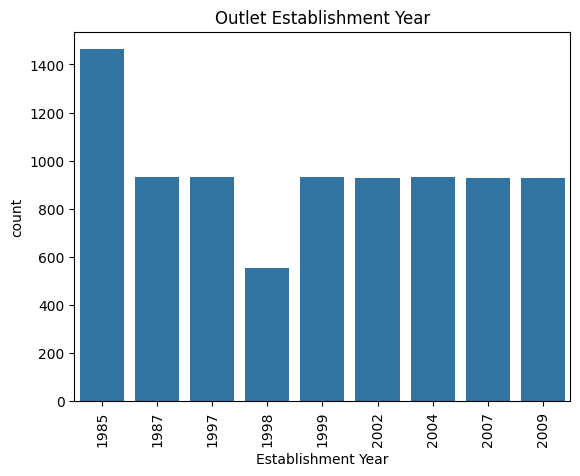

In [64]:
ax =sns.countplot(x = 'Outlet_Establishment_Year', data = df)
ax.set_title('Outlet Establishment Year')
ax.set_xlabel('Establishment Year');
plt.xticks(rotation = 90);

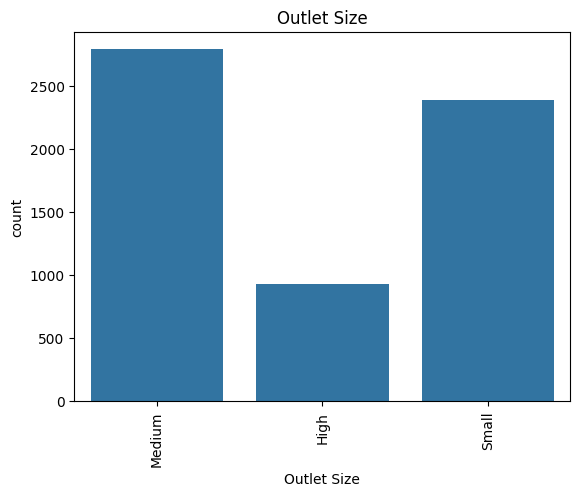

In [69]:
df_nonmissing = df[df['Outlet_Size'] != 'MISSING']
ax =sns.countplot(x = 'Outlet_Size', data = df_nonmissing)
ax.set_title('Outlet Size')
ax.set_xlabel('Outlet Size');
plt.xticks(rotation = 90);

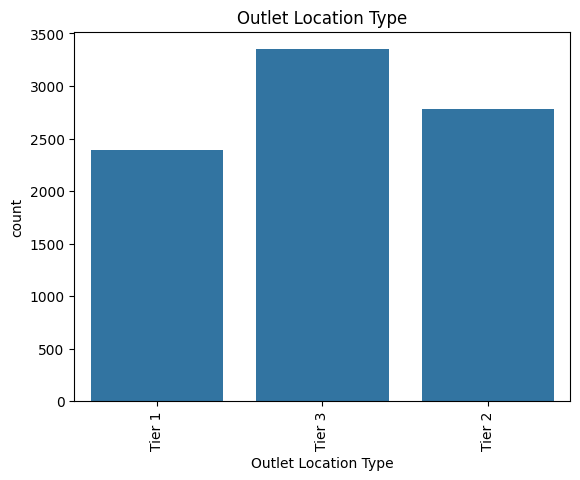

In [66]:
ax =sns.countplot(x = 'Outlet_Location_Type', data = df)
ax.set_title('Outlet Location Type')
ax.set_xlabel('Outlet Location Type');
plt.xticks(rotation = 90);

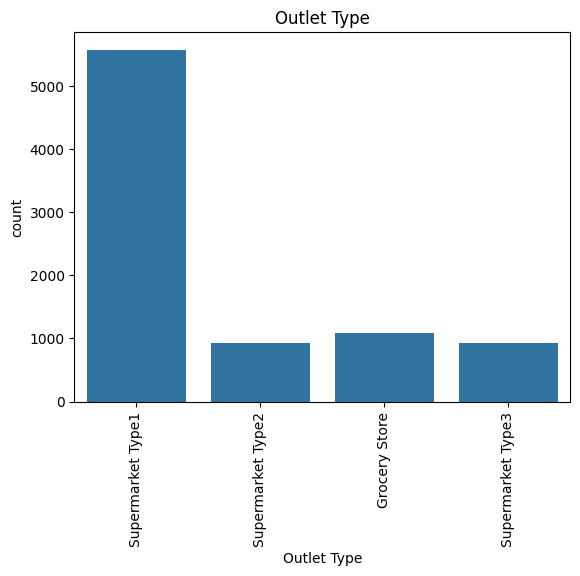

In [67]:
ax =sns.countplot(x = 'Outlet_Type', data = df)
ax.set_title('Outlet Type')
ax.set_xlabel('Outlet Type');
plt.xticks(rotation = 90);

*The following heatmap shows the correlation between numerical columns of the dataset.*

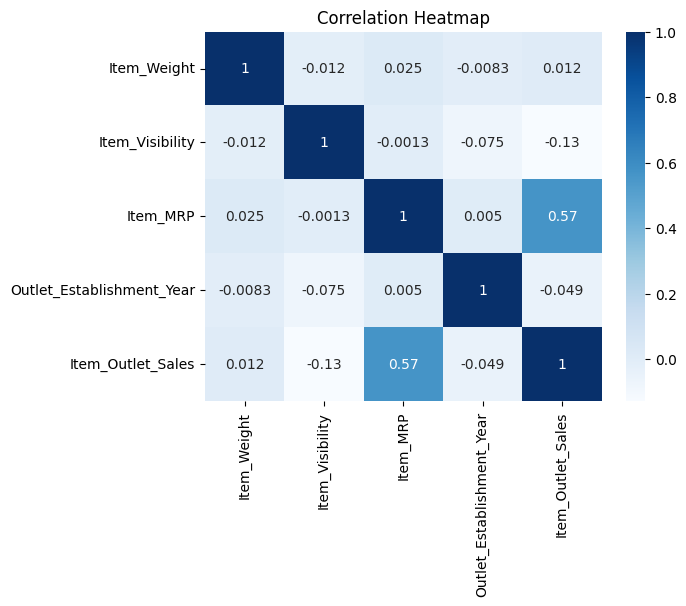

In [82]:
corr= df.corr(numeric_only=True)
ax = sns.heatmap(corr, annot=True, cmap = 'Blues')
ax.set_title('Correlation Heatmap');


*The heatmap shows low correlation levels between all columns except between the maximum retail price and outlet sale numbers, which have moderate correlation.*